<a href="https://colab.research.google.com/github/piotr-stefanski/fruit-and-vegetable-classification/blob/ayo/klasyfikacja_owocow_i_warzyw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importowanie danych z dysku**

In [ ]:
!pip install -U --no-cache-dir gdown --pre

!rm -rf data && mkdir data

!gdown 1uUITb6_VE_U4c2mx870GhNOfR9SJ4JMP -O data.zip

!unzip -q data.zip -d data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1uUITb6_VE_U4c2mx870GhNOfR9SJ4JMP
From (redirected): https://drive.google.com/uc?id=1uUITb6_VE_U4c2mx870GhNOfR9SJ4JMP&confirm=t&uuid=b627c9f5-ca1a-4463-97b7-2b16fe2c811c
To: /content/data.zip
100% 59.7M/59.7M [00:01<00:00, 33.1MB/s]


## **Importowanie bibliotek**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob
import os
import xml.etree.ElementTree as ET

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Trenowanie**

In [ ]:
batch_size = 16
class_count = 10

img_height = 64
img_width = 64

print(os.getcwd())

train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = "training",
  validation_split = 0.7,  # 70% of the data for training
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = 'validation',
  validation_split = 0.15,  # 15% of the data for validation
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = 'validation',
  validation_split = 0.15,  # 15% of the data for testing
  seed=124,  # Use a different seed to get a different subset of data
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Wyświetlenie klas
class_names = train_ds.class_names
print(f'class names: {class_names}')

#Drobna optymalizacja
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

from tensorflow.keras import regularizers

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/content
Found 6267 files belonging to 10 classes.
Using 1881 files for training.
Found 6267 files belonging to 10 classes.
Using 940 files for validation.
Found 6267 files belonging to 10 classes.
Using 940 files for validation.
class names: ['apple', 'avocado', 'banana', 'kiwi', 'mandarin', 'orange', 'pear', 'pepper', 'potato', 'tomato']


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 30

callbacks = [
    ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks
)


Epoch 1/30
118/118 [==============================] - ETA: 0s - loss: 2.1515 - accuracy: 0.4572
Epoch 1: val_loss improved from inf to 1.45583, saving model to model.h5
118/118 [==============================] - 15s 103ms/step - loss: 2.1515 - accuracy: 0.4572 - val_loss: 1.4558 - val_accuracy: 0.5968
Epoch 2/30
  2/118 [..............................] - ETA: 7s - loss: 1.3931 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - ETA: 0s - loss: 1.2582 - accuracy: 0.6305
Epoch 2: val_loss improved from 1.45583 to 1.01972, saving model to model.h5
118/118 [==============================] - 11s 90ms/step - loss: 1.2582 - accuracy: 0.6305 - val_loss: 1.0197 - val_accuracy: 0.7106
Epoch 3/30
118/118 [==============================] - ETA: 0s - loss: 1.0213 - accuracy: 0.7065
Epoch 3: val_loss improved from 1.01972 to 0.75376, saving model to model.h5
118/118 [==============================] - 10s 89ms/step - loss: 1.0213 - accuracy: 0.7065 - val_loss: 0.7538 - val_accuracy: 0.8128
Epoch 4/30
118/118 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.7581
Epoch 4: val_loss did not improve from 0.75376
118/118 [==============================] - 10s 85ms/step - loss: 0.8700 - accuracy: 0.7581 - val_loss: 0.9383 - val_accuracy: 0.7149
Epoch 5/30
118/118 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.8171
Epoch 5: val_loss improved 

## **Wyświetlanie danych**

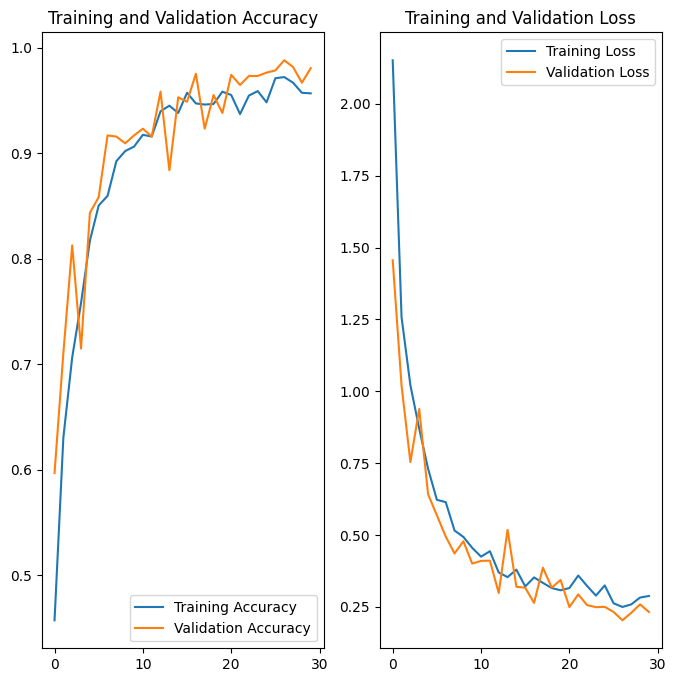

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose=0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis=1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true, y_pred))

evaluate_model(val_ds, model)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       293
           1       0.98      0.93      0.96        46
           2       0.99      0.98      0.99       209
           3       0.88      1.00      0.94        22
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27
           6       0.93      0.99      0.96        68
           7       0.94      1.00      0.97        82
           8       1.00      0.94      0.97        48
           9       1.00      1.00      1.00       117

    accuracy                           0.98       940
   macro avg       0.97      0.98      0.98       940
weighted avg       0.98      0.98      0.98       940



## **Testowanie modelu**

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)
print()
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/kiwi.jpg', target_size=(img_height, img_width))

img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This ia probably a/an {} with {:.2f}% prediction."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

59/59 - 3s - loss: 0.2498 - accuracy: 0.9787 - 3s/epoch - 45ms/step

Test accuracy: 0.978723406791687

1/1 [==============================] - 0s 31ms/step
This ia probably a/an kiwi with 98.55% prediction.
